Phase 1 : Importing and Exploring data  

In [4]:
import pandas as pd 
import numpy as np
data = pd.read_csv('hospital_readmissions.csv')
df = pd.DataFrame(data)
df.head()       

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
# Summary statistics for numerical features
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [7]:
# Check for missing values
print(df.isnull().sum())
duplicates = df.duplicated()
print(duplicates.sum())


age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64
0


Phase 2 : Exploratory Data Analysis 

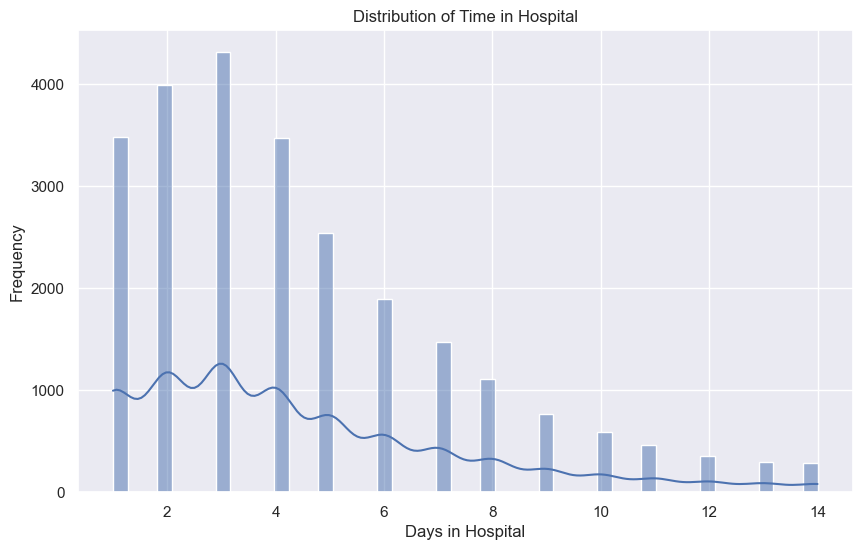

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(df['time_in_hospital'], kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')
plt.show()

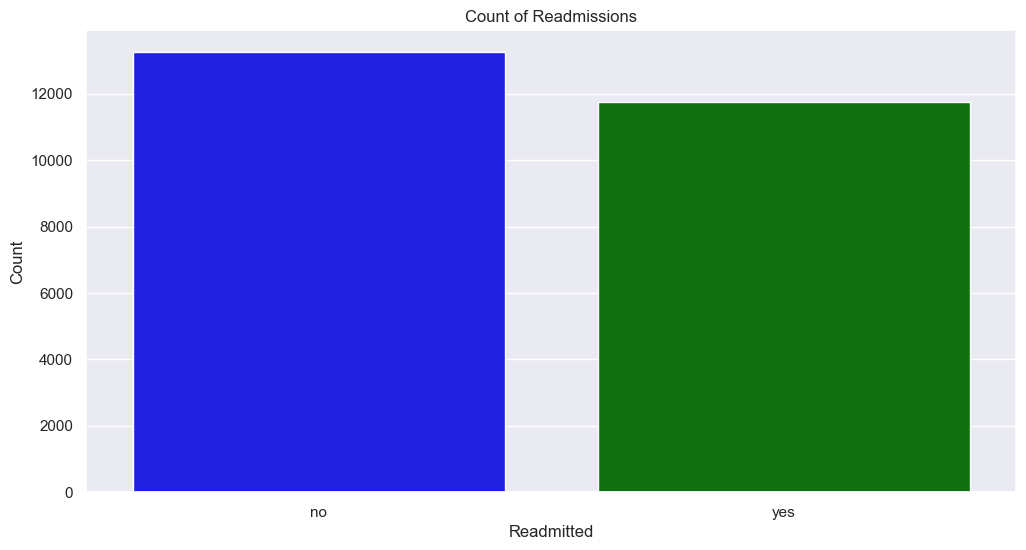

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='readmitted', data=df, palette=['blue', 'green'], legend= False, hue='readmitted')
plt.title('Count of Readmissions')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


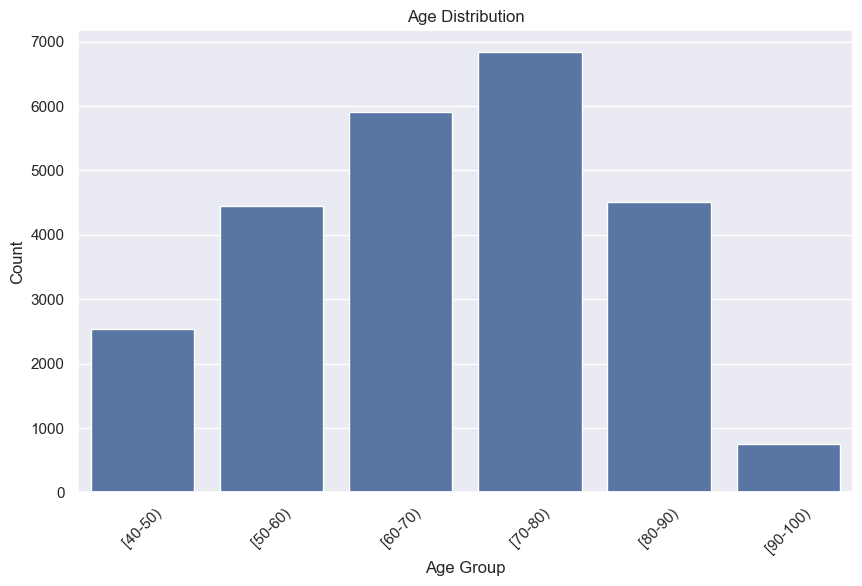

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, order=sorted(df['age'].unique()))
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

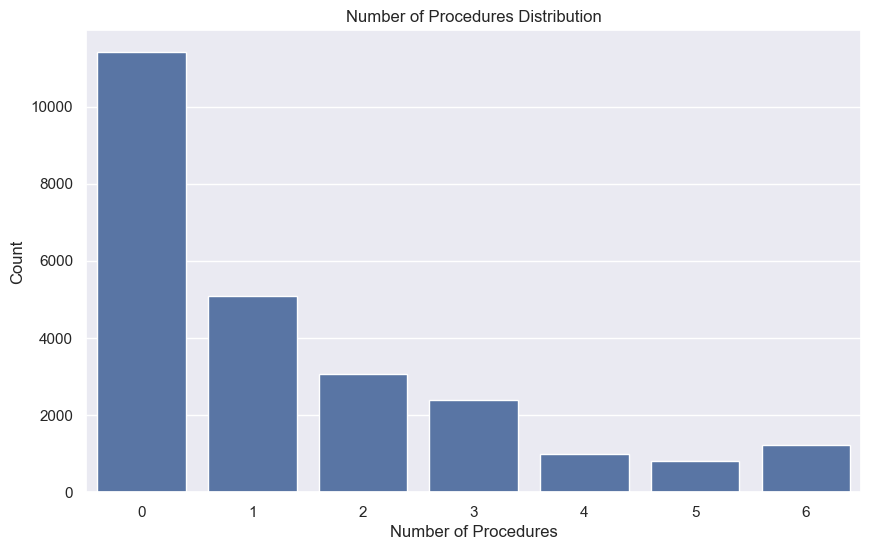

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='n_procedures', data=df)
plt.title('Number of Procedures Distribution')
plt.xlabel('Number of Procedures')
plt.ylabel('Count')
plt.show()


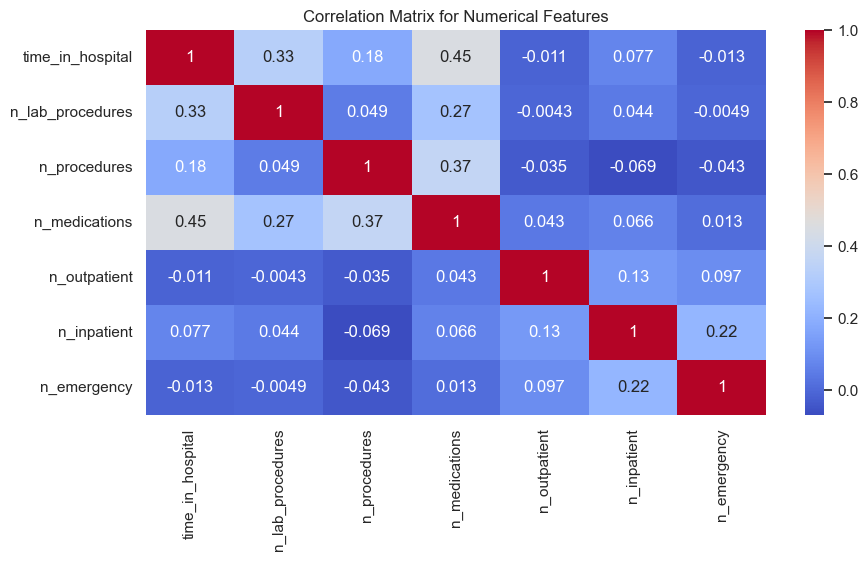

In [29]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix for numerical features only
corr_matrix_numerical = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

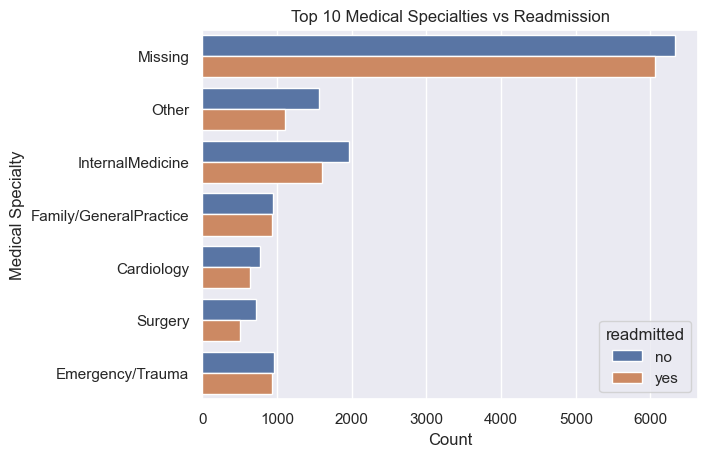

In [32]:
top_specialties = df['medical_specialty'].value_counts().nlargest(10).index
filtered_data = df[df['medical_specialty'].isin(top_specialties)]
sns.countplot(y='medical_specialty', hue='readmitted', data=filtered_data)
plt.title('Top 10 Medical Specialties vs Readmission')
plt.xlabel('Count')
plt.ylabel('Medical Specialty')
plt.show()
